<a href="https://colab.research.google.com/github/ZZongSeung/train_test_loop-algorithm/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# cuda 설정
if torch.cuda.is_available()==True:
  device = torch.device("cuda")
  print(device)
else:
  device = torch.device("cpu")
  print(device)

cuda


In [3]:
# dataset 준비
training_data = datasets.FashionMNIST(
    root = '/content',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = '/content',
    train = False,
    download = True,
    transform = ToTensor(), # tensor생성시 [0,1]의 값을 가지는 scale data로 만들어준다.
)

100%|██████████| 26421880/26421880 [00:00<00:00, 115449538.05it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 14718212.17it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 56825748.27it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21315179.66it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [4]:
# 데이터로더 생성 - tensor에
# 모델 돌릴때 사용하면 된다!!!!!
train_loader=DataLoader(training_data,
                        batch_size = 64,
                        shuffle = True)

test_loader = DataLoader(test_data,
                          batch_size = 128,
                          shuffle= False)

# 본격 EDA

In [5]:

train_features, train_target= next(iter(train_loader)) # 첫번째 배치의 이미지 가져오기(train_data, target))

In [6]:
train_features.size() # torch.Size([64, 1, 28, 28]) - 배치사이즈 . 흑백이므로 1 / 28*28데이터

torch.Size([64, 1, 28, 28])

In [7]:
train_target.size() # torch.Size([64]) - target은 1개로 지정했기 때문임.

torch.Size([64])

#### squeeze와 reshape의 차이점
 * squeeze : 불필요한 1인 차원을 제거하려는 경우(이때 1만 타깃으로 삼아서 제거한다. - 이때 차원은 유지)
 * reshape : 수동으로 차원을 줄이고자(조정하고자)하는 경우


Text(0.5, 1.0, 'image : 9')

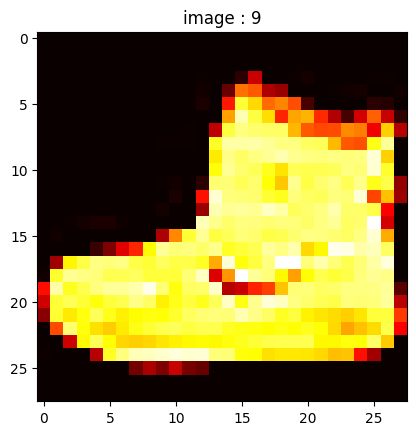

In [8]:
# 훈련 시작준비 : 이때는 training_data

img, labels = training_data[0]

plt.imshow(img.squeeze(), cmap="hot") # imshow 이미지를 보여주는 값
plt.title(f"image : {labels}")

# Img 생성

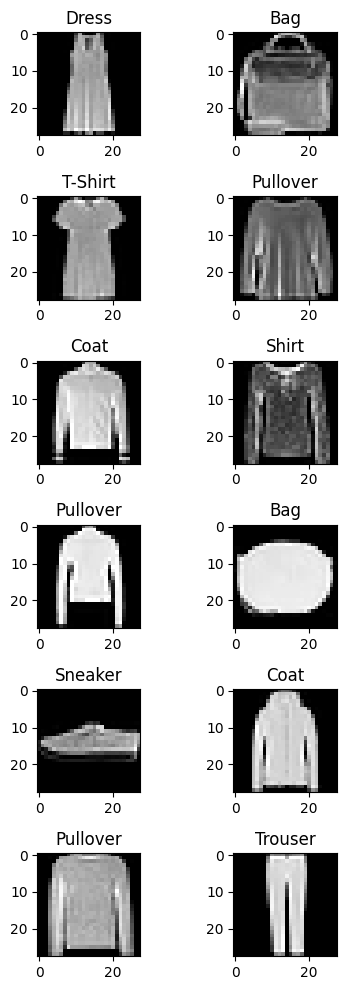

In [9]:
# target 생성
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 이미지를 무작위로 생성하여 5*2 image를 생성해보자
row=6
col=2
fig, axs = plt.subplots(row, col, figsize=(5,10))

for i in range(0, row):
  for j in range(0, col):
    plot_index = i*col+j
    if plot_index < 13:
      index = np.random.randint(len(training_data), size=(1,)).item()
      img, target = training_data[index] # loop가 계속 돌때마다 그림을 그려줌
      axs[i,j].imshow(img.squeeze(), cmap="gray")
      axs[i,j].set_title(labels_map[target])
      fig.tight_layout()
    else:
      fig.delaxes(axs[i,j])
  # 자동으로 서브플롯 사이의 여백을 조정
plt.show()

# 신경망 생성

In [10]:
class BasicNet(nn.Module):
  def __init__(self):
    super(BasicNet,self).__init__()
    self.flattern = nn.Flatten() # 2->1차원 변경
    self.classifier = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self, x):
    out = self.flattern(x)
    out = self.classifier(out)
    return out

In [19]:
model = BasicNet().to(device)
print(model)

BasicNet(
  (flattern): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [20]:
# model test
X = torch.rand(1, 28, 28, device = device)
output = model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

모델 출력 결과: tensor([[-0.1520, -0.0277,  0.1760, -0.0542, -0.0191, -0.1031, -0.1659, -0.1294,
         -0.1046, -0.1446]], device='cuda:0', grad_fn=<AddmmBackward0>)

Softmax 결과: tensor([[0.0919, 0.1041, 0.1276, 0.1013, 0.1050, 0.0965, 0.0906, 0.0940, 0.0964,
         0.0926]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

tensor(2, device='cuda:0')


In [21]:
# model train
# 1. model compile -> train_model codes -> test_model codes -> epochs

# model compile

In [22]:
loss = nn.CrossEntropyLoss()
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

# train_loop

In [23]:
def train_loop(model, train_loader, loss_fn, optimizer):
  set_size = len(train_loader.dataset)

  for batch, (input, target) in enumerate(train_loader):
    input, target = input.to(device), target.to(device)
    pred = model(input)

    # 손실
    loss = loss_fn(pred, target)

    # backpropagation
    loss.backward()
    optimizer.step()

    #
    if batch % 100 ==0: #
      loss, current = loss.item(), batch * len(input)
      print(f"loss : {loss} [{current:>5d}] / {set_size:5d}")

2

In [56]:
    set_size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss = 0
    correct = 0

    all_predictions = []  # 예측 결과를 저장할 리스트
    all_targets = []      # 실제 레이블을 저장할 리스트

    with torch.no_grad():
        for batch, (input, target) in enumerate(test_loader):
            input, target = input.to(device), target.to(device)
            pred = model(input)

            test_loss += loss_fn(pred, target).item()
            correct += (pred.argmax(1) == target).type(torch.float).sum().item()

        test_loss /= num_batches
        correct /= set_size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")


In [92]:
#
best_correct = 0.0  # 가장 높은 정확도를 저장할 변수
best_epoch = 0      # 가장 높은 정확도를 가진 에포크 번호를 저장할 변수

# 최적 epochs일 때 예측값을 넣기
best_real = []
best_predict = []
error = {}

for i in range(20):  # 에포크 횟수
    print(f"Epoch {i+1} \n------------------------")
    train_loop(model, train_loader, loss, optimizer)

    # test_loop 임--------------------------------------------.
    set_size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss = 0
    correct = 0

    current_real = []
    current_predict = []

    with torch.no_grad():
        for batch, (input, target) in enumerate(test_loader):
            input, target = input.to(device), target.to(device)
            pred = model(input)

            test_loss += loss(pred, target).item()  # 각 배치 손실 더하기
            correct += (pred.argmax(1) == target).type(torch.float).sum().item()  # 정확한 예측 수 더하기

            # 현재 배치의 예측 값과 실제 값을 저장
            current_predict.extend(pred.argmax(1).cpu().numpy())
            current_real.extend(target.cpu().numpy())

    test_loss /= num_batches  # 에포크 전체에 대한 평균 손실
    correct /= set_size       # 에포크 전체에 대한 정확도
    error[i]=test_loss   # 에포크 별 에러 저장
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

    # 정확도에 따른 best epoch 업데이트
    if correct > best_correct:
        best_correct = correct
        best_epoch = i + 1
        best_predict = current_predict  # 최적 에포크의 예측 값 저장
        best_real = current_real        # 최적 에포크의 실제 값 저장

print(f"Best epoch is {best_epoch} with an accuracy of {best_correct*100:.1f}%")

Epoch 1 
------------------------
loss : 0.7868512868881226 [    0] / 60000
loss : 0.5505837202072144 [ 6400] / 60000
loss : 1.219683051109314 [12800] / 60000
loss : 0.5820088982582092 [19200] / 60000
loss : 0.6108638048171997 [25600] / 60000
loss : 0.655767023563385 [32000] / 60000
loss : 0.7706078290939331 [38400] / 60000
loss : 0.5489481687545776 [44800] / 60000
loss : 0.699646532535553 [51200] / 60000
loss : 0.6133694648742676 [57600] / 60000
Test Error: 
 Accuracy: 79.0%, Avg loss: 2.195519

Epoch 2 
------------------------
loss : 0.38235560059547424 [    0] / 60000
loss : 0.32611751556396484 [ 6400] / 60000
loss : 0.7082059979438782 [12800] / 60000
loss : 0.7036393284797668 [19200] / 60000
loss : 1.1006413698196411 [25600] / 60000
loss : 0.6098340749740601 [32000] / 60000
loss : 0.4035731256008148 [38400] / 60000
loss : 0.4729124903678894 [44800] / 60000
loss : 0.4314500689506531 [51200] / 60000
loss : 0.6872042417526245 [57600] / 60000
Test Error: 
 Accuracy: 78.2%, Avg loss: 2

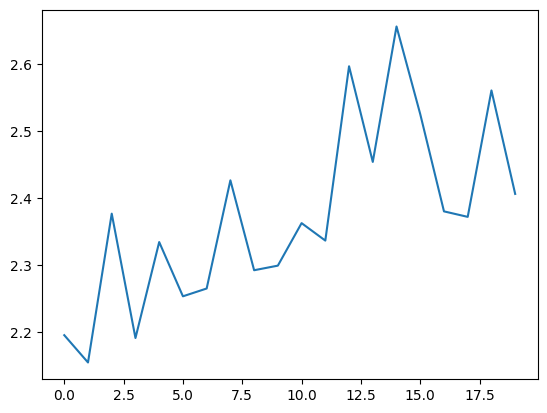

In [94]:
# 최적 에포크에서의 예측 값과 실제 값
plt.plot(error.keys(), error.values()) # 100번은 계속 학습했으므로 이런 값이 나온다.......

[3.9367613792419434,
 4.643320083618164,
 5.473824560642242,
 6.180828094482422,
 7.051172733306885,
 9.095940828323364,
 9.931646943092346,
 10.786903023719788,
 11.591747879981995,
 16.85083019733429,
 17.919602513313293,
 18.818431317806244,
 19.7771058678627,
 20.369374871253967,
 20.90469539165497,
 22.809484601020813,
 24.107794404029846,
 24.66753798723221,
 25.392771661281586,
 26.226169049739838,
 27.100449800491333,
 28.004775643348694,
 30.423244833946228,
 32.28112530708313,
 33.481483936309814,
 34.54966151714325,
 35.074471831321716,
 36.67803871631622,
 37.246814131736755,
 38.13125514984131,
 46.377760887145996,
 48.372726917266846,
 48.91417700052261,
 50.12640529870987,
 70.67914348840714,
 78.84755951166153,
 79.98066109418869,
 83.89686411619186,
 84.76160085201263,
 86.33712637424469,
 94.38653910160065,
 96.71445310115814,
 97.48958051204681,
 98.4868169426918,
 101.77089458703995,
 102.545265853405,
 103.14363944530487,
 104.34022343158722,
 105.77691984176636,
 